In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('winequalityN.csv')
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
data.shape

(6497, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [6]:
for col in data.columns:
  if data[col].isnull().sum() > 0:
    data[col] = data[col].fillna(data[col].mean())

data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

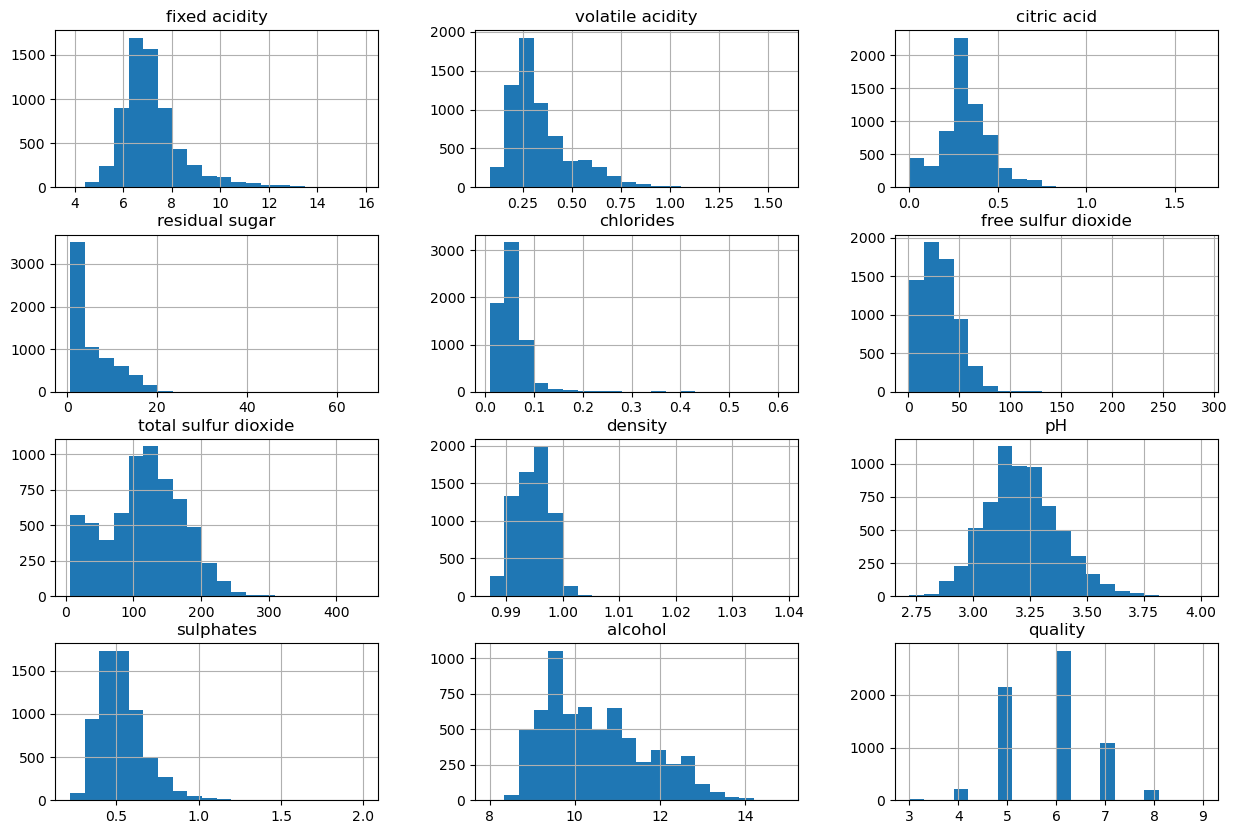

In [7]:
data.hist(bins=20,figsize=(15,10))
plt.show()

In [8]:
data.replace({'white': 1, 'red': 0}, inplace=True)

C:\Users\aumpa\AppData\Local\Temp\ipykernel_32368\1313587177.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'white': 1, 'red': 0}, inplace=True)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


<Axes: >

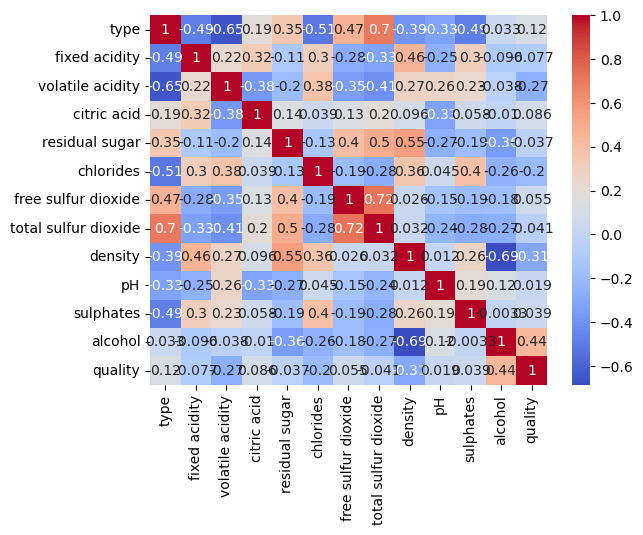

In [10]:
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)


In [11]:
data.drop(columns='total sulfur dioxide',axis=1,inplace=True)

In [12]:
data['best quality'] = [1 if x>5 else 0 for x in data.quality]

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   type                 6497 non-null   int64  
 1   fixed acidity        6497 non-null   float64
 2   volatile acidity     6497 non-null   float64
 3   citric acid          6497 non-null   float64
 4   residual sugar       6497 non-null   float64
 5   chlorides            6497 non-null   float64
 6   free sulfur dioxide  6497 non-null   float64
 7   density              6497 non-null   float64
 8   pH                   6497 non-null   float64
 9   sulphates            6497 non-null   float64
 10  alcohol              6497 non-null   float64
 11  quality              6497 non-null   int64  
 12  best quality         6497 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 660.0 KB


In [14]:
X = data.drop(['quality','best quality'],axis=1)
y = data['best quality']

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(5197, 11)
(1300, 11)
(5197,)
(1300,)


In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [18]:
from sklearn.preprocessing import MinMaxScaler
normalize = MinMaxScaler()
X_train = normalize.fit_transform(X_train)
X_test = normalize.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

training model LogisticRegression()
accuracy on training data using LogisticRegression() is 0.7386954011929959

precision score on training data using LogisticRegression()is 0.7633525061626951

classification report of training data using LogisticRegression() is               precision    recall  f1-score   support

           0       0.68      0.55      0.61      1916
           1       0.76      0.85      0.80      3281

    accuracy                           0.74      5197
   macro avg       0.72      0.70      0.71      5197
weighted avg       0.73      0.74      0.73      5197

confusion matrix of training data using LogisticRegression() is [[1052  864]
 [ 494 2787]]


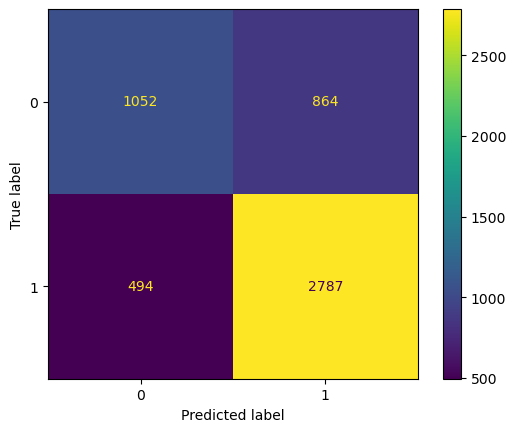

----------------------------------------------------------------------------------
accuracy on testing data using LogisticRegression() is 0.7492307692307693

precision score on testing data using LogisticRegression() is 0.7849099099099099

classification report of testing data using LogisticRegression() is               precision    recall  f1-score   support

           0       0.67      0.59      0.63       468
           1       0.78      0.84      0.81       832

    accuracy                           0.75      1300
   macro avg       0.73      0.71      0.72      1300
weighted avg       0.74      0.75      0.75      1300

confusion matrix of testing data using LogisticRegression() is [[277 191]
 [135 697]]


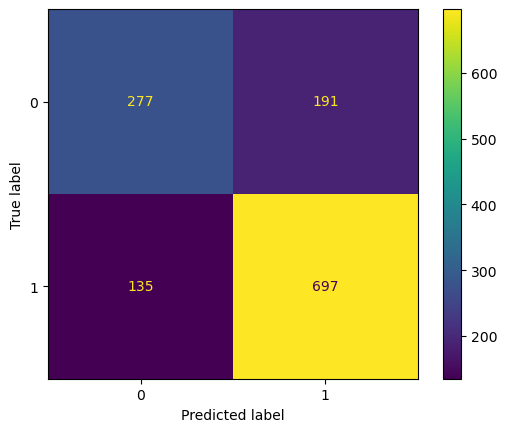

training model RandomForestClassifier()
accuracy on training data using RandomForestClassifier() is 1.0

precision score on training data using RandomForestClassifier()is 1.0

classification report of training data using RandomForestClassifier() is               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1916
           1       1.00      1.00      1.00      3281

    accuracy                           1.00      5197
   macro avg       1.00      1.00      1.00      5197
weighted avg       1.00      1.00      1.00      5197

confusion matrix of training data using RandomForestClassifier() is [[1916    0]
 [   0 3281]]


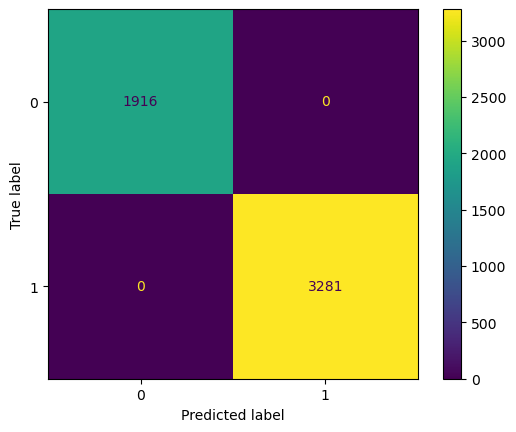

----------------------------------------------------------------------------------
accuracy on testing data using RandomForestClassifier() is 0.8415384615384616

precision score on testing data using RandomForestClassifier() is 0.8752997601918465

classification report of testing data using RandomForestClassifier() is               precision    recall  f1-score   support

           0       0.78      0.78      0.78       468
           1       0.88      0.88      0.88       832

    accuracy                           0.84      1300
   macro avg       0.83      0.83      0.83      1300
weighted avg       0.84      0.84      0.84      1300

confusion matrix of testing data using RandomForestClassifier() is [[364 104]
 [102 730]]


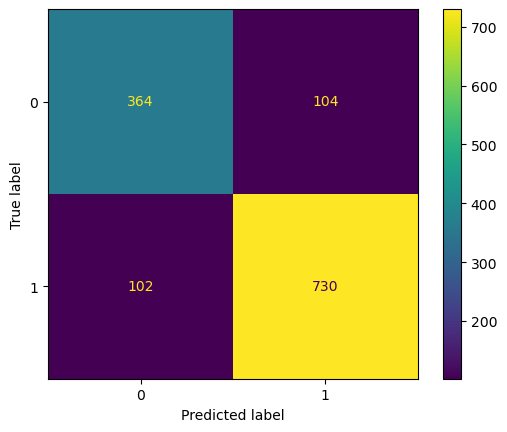

training model SVC()
accuracy on training data using SVC() is 0.748123917644795

precision score on training data using SVC()is 0.7642015005359056

classification report of training data using SVC() is               precision    recall  f1-score   support

           0       0.71      0.54      0.61      1916
           1       0.76      0.87      0.81      3281

    accuracy                           0.75      5197
   macro avg       0.74      0.70      0.71      5197
weighted avg       0.74      0.75      0.74      5197

confusion matrix of training data using SVC() is [[1036  880]
 [ 429 2852]]


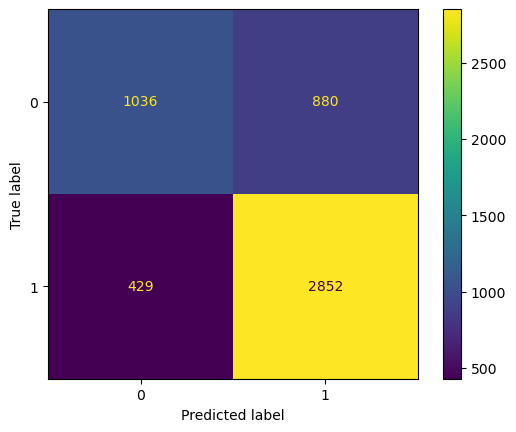

----------------------------------------------------------------------------------
accuracy on testing data using SVC() is 0.7546153846153846

precision score on testing data using SVC() is 0.7785016286644951

classification report of testing data using SVC() is               precision    recall  f1-score   support

           0       0.70      0.56      0.62       468
           1       0.78      0.86      0.82       832

    accuracy                           0.75      1300
   macro avg       0.74      0.71      0.72      1300
weighted avg       0.75      0.75      0.75      1300

confusion matrix of testing data using SVC() is [[264 204]
 [115 717]]


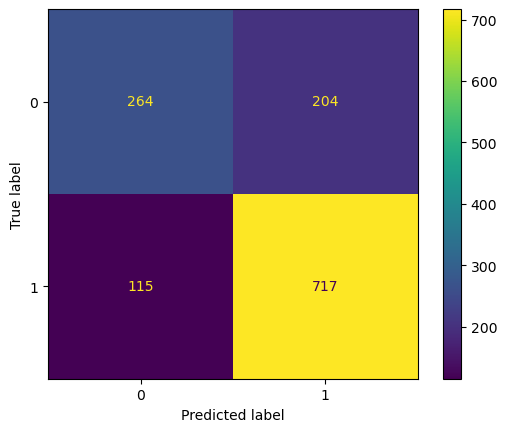

training model XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
accuracy on training data using XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=N

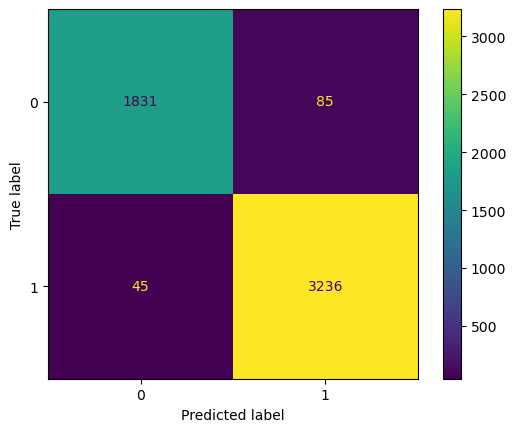

----------------------------------------------------------------------------------
accuracy on testing data using XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) is 0.83

precision score on testing data using XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsam

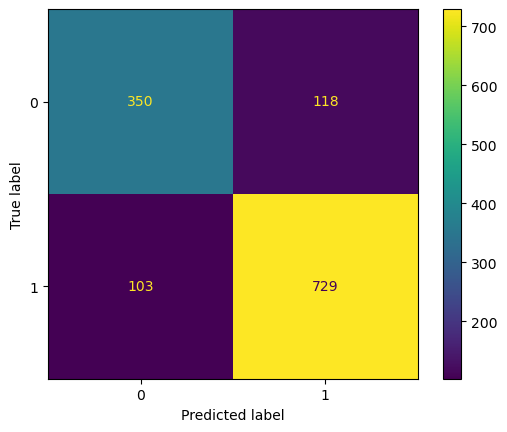

In [22]:
models = {'Logistic Regression':LogisticRegression(),
          'Random ForestRandom': RandomForestClassifier(),
          'SVM':SVC(kernel='rbf'),
          'XGBoost':XGBClassifier()
        }
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    print(f"training model {model}") 
    train_predict = model.predict(X_train)
    train_accuracy_score = accuracy_score(y_train,train_predict)
    print(f"accuracy on training data using {model} is {train_accuracy_score}")
    print()
    train_precision_score = precision_score(y_train,train_predict)
    print(f"precision score on training data using {model}is {train_precision_score}")
    print()
    train_classification_report = classification_report(y_train,train_predict)
    print(f"classification report of training data using {model} is {train_classification_report}")
    train_confusion_matrix = confusion_matrix(y_train,train_predict)
    print(f"confusion matrix of training data using {model} is {train_confusion_matrix}")
    cm = ConfusionMatrixDisplay(train_confusion_matrix,display_labels=model.classes_)
    cm.plot()
    plt.show()


    print("----------------------------------------------------------------------------------")

    test_pred = model.predict(X_test)
    test_accuracy_score = accuracy_score(y_test,test_pred)
    print(f"accuracy on testing data using {model} is {test_accuracy_score}")
    print()
    test_precision_score = precision_score(y_test,test_pred)
    print(f"precision score on testing data using {model} is {test_precision_score}")
    print()
    test_classification_report = classification_report(y_test,test_pred)
    print(f"classification report of testing data using {model} is {test_classification_report}")
    test_confusion_matrix = confusion_matrix(y_test,test_pred)
    print(f"confusion matrix of testing data using {model} is {test_confusion_matrix}")
    test_cm = ConfusionMatrixDisplay(test_confusion_matrix,display_labels=model.classes_)
    test_cm.plot()
    plt.show()


    print("====================================================================================")